# Exploring the dataset
## Background
The **WiLI-2018 dataset** (Wikipedia Language Identification) is a benchmark dataset designed for written language identification tasks. Introduced by **Martin Thoma** in 2018, it consists of **1,000 short texts** for each of **235 languages**, sourced from Wikipedia. The dataset includes a diverse range of languages, covering different writing systems and linguistic families. WiLI-2018 serves as a standard evaluation set for language identification models, allowing researchers to compare performance across a broad spectrum of languages. It is structured to facilitate machine learning experiments, with balanced class distributions to ensure fair comparisons. [1]

The dataset used in this project is a subset of the WiLI-2018 dataset, focusing on a smaller number of languages. This subset includes **22 languages** with **1,000 samples** each, resulting in a total of **22,000 samples**. Furthermore, it was preprocessed in an undisclosed manner by Khan, the author of the dataset on Kaggle. [3]

## First look
Let's start by loading the dataset and examining its structure.


In [1]:
import pandas as pd

# Load the dataset
file_path = "../data/wili_subset_khan.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


The dataset contains **22,000 samples** and **2 columns** (`text` and `language`). There are no missing values, meaning every row has both text and a corresponding language label.

In [3]:
# Display the first few rows of the dataset
df.head(20)

,text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


The `text` column contains multilingual text samples. The `language` column labels each text sample with its respective language. The text samples vary significantly in length and script (Latin, Cyrillic, Thai, Tamil, etc.).

## Duplicates
Let's check for duplicates.

In [3]:
# Check for duplicate entries
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(141)

There are **141 duplicate entries** in the dataset. Let's take a closer look at these duplicates.

In [4]:
# Display duplicate entries
duplicates = df[df.duplicated(keep=False)]
duplicates.head(10)

,text,language
166,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
209,inlandsklimat råder i trakten årsmedeltemperat...,Swedish
220,تاثيرات ئي پنسلينونه ورته دي داسيدو په مقابل ک...,Pushto
410,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
440,aastakümned aastad aastad aastad aastad a...,Estonian
526,haec commentatio automatice praeparata res ast...,Latin
581,haec commentatio automatice praeparata res ast...,Latin
647,இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட...,Tamil
1012,haec commentatio automatice praeparata res ast...,Latin
1027,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian


The duplicates are equal in text and label, e.g. including texts written in Indonesian or Latin. A removal of these duplicates could be performed to ensure the dataset's integrity.

## Language distribution
At first, let's see which languages are included in the dataset.

In [5]:
# List unique languages
unique_languages = df['language'].unique()
unique_languages

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

There seems to be a typo in the language label for "Portuguese". Let's correct this.

In [6]:
# Correcting the typo in 'Portuguese'
df.loc[df['language'] == 'Portugese', 'language'] = 'Portuguese'

It might also be beneficial to have the labels in a standardized format, like ISO 639-1 language codes. Let's map the language names to their respective ISO codes.

In [7]:
# Corresponding ISO 639-3 codes
iso_639_3_codes = {
    'Estonian': 'est',
    'Swedish': 'swe',
    'Thai': 'tha',
    'Tamil': 'tam',
    'Dutch': 'nld',
    'Japanese': 'jpn',
    'Turkish': 'tur',
    'Latin': 'lat',
    'Urdu': 'urd',
    'Indonesian': 'ind',
    'Portuguese': 'por',
    'French': 'fra',
    'Chinese': 'zho',
    'Korean': 'kor',
    'Hindi': 'hin',
    'Spanish': 'spa',
    'Pushto': 'pus',
    'Persian': 'fas',
    'Romanian': 'ron',
    'Russian': 'rus',
    'English': 'eng',
    'Arabic': 'ara'
}

# Map language names to ISO 639-3 codes
df['lang_code'] = df['language'].map(iso_639_3_codes)

Next, let's explore the distribution of languages in the dataset.

In [8]:
# Count unique languages
num_unique_languages = df['language'].nunique()

# Frequency distribution of languages
language_counts = df['language'].value_counts()

# Summary of language distribution
most_common_languages = language_counts.head(5)  # Top 5 most common languages
least_common_languages = language_counts.tail(5)  # Least common languages

num_unique_languages, most_common_languages, least_common_languages

(22,
 language
 Estonian    1000
 Swedish     1000
 Thai        1000
 Tamil       1000
 Dutch       1000
 Name: count, dtype: int64,
 language
 Persian     1000
 Romanian    1000
 Russian     1000
 English     1000
 Arabic      1000
 Name: count, dtype: int64)

The dataset contains **22 languages**. Each language appears **exactly 1,000 times**, meaning the dataset is perfectly balanced across languages.

## Text length distribution
Let's examine the distribution of text lengths in the dataset.

In [9]:
# Compute text length in characters and words
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().apply(len)

# Summary statistics
char_count_stats = df['char_count'].describe()
word_count_stats = df['word_count'].describe()

char_count_stats, word_count_stats

(count    22000.000000
 mean       356.033227
 std        238.614087
 min          8.000000
 25%        187.000000
 50%        274.000000
 75%        441.000000
 max       1341.000000
 Name: char_count, dtype: float64,
 count    22000.000000
 mean        53.317409
 std         44.745736
 min          0.000000
 25%         25.000000
 50%         41.000000
 75%         69.000000
 max        331.000000
 Name: word_count, dtype: float64)

- **Character count:**
  - Average text length: **356 characters**.
  - Shortest text: **8 characters**.
  - Longest text: **1,341 characters**.
- **Word count:**
  - Average word count: **53 words**.
  - Minimum word count: **0 (possible empty or non-space-separated text)**.
  - Maximum word count: **331 words**.

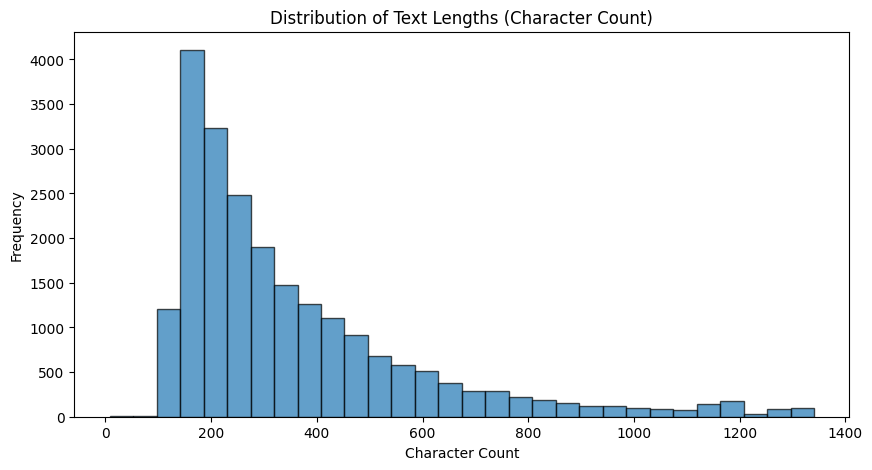

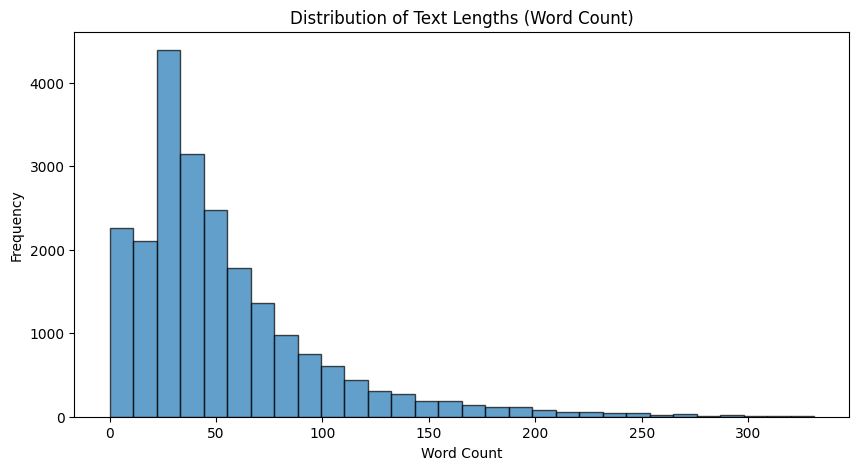

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of character count
plt.figure(figsize=(10, 5))
plt.hist(df['char_count'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths (Character Count)")
plt.show()

# Plot histogram of word count
plt.figure(figsize=(10, 5))
plt.hist(df['word_count'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths (Word Count)")
plt.show()

- **Text Length Distribution**:
   - The majority of texts fall between **100 to 500 characters**.
   - There are some very long texts (**above 1,000 characters**), which might need further investigation.

- **Word Count Distribution**:
   - Most samples have **20 to 100 words**.
   - A few texts contain **over 300 words**, which might be outliers.

## Outlier
Let us investigate outliers w.r.t. text length.

In [11]:
# Display the top 5 shortest texts
shortest_texts = df.nsmallest(5, 'char_count')[['text', 'language', 'char_count']]
shortest_texts

,text,language,char_count
9380,謙譲は接尾辞-s,Japanese,8
9483,is-（ある・いる）は、-,Japanese,13
18176,,Dutch,41
7175,maailma karika kokkuvõttes oli ta ...,Estonian,62
10591,中期朝鮮語の連体形（冠形詞形）は現代朝鮮語と同様にn系とr系の系列がある。n系・r系ともに「...,Japanese,78


The shortest text has only **8 characters**, which might be an outlier. Further, the Dutch text with **41 characters** seems to be empty. Let's investigate further.

In [12]:
# Display set of characters in the Dutch text
dutch_text = df[df['char_count'] == 41].iloc[0]['text']
set(dutch_text)

{' '}

As suspected, the Dutch texts consists of only **whitespace characters**. This will be impossible to classify, a perfect score is not achievable.

In [13]:
# Check if there are more texts containing only whitespace characters
whitespace_texts = df[df['text'].str.isspace()]
whitespace_texts

,text,language,lang_code,char_count,word_count
18176,,Dutch,nld,41,0


As there are no more texts containing only whitespace characters, it seems that the Dutch text is the only one. This single sample will hardly affect the overall performance of the model, but proves that even a benchmark dataset can contain such anomalies. If desired, it can be removed from the dataset like so:

In [14]:
# Clean the dataset by removing whitespace-only texts
df = df[df['text'].str.strip() != ""]

## Similarity to WiLI-2018
Let us examine how similar the dataset is to the original WiLI-2018 dataset. We start by loading the data.

In [15]:
import os

# Load WiLI-2018 dataset
file_paths = {name: os.path.join("../data/wili-2018", fname) for name, fname in
              [("x_train", "x_train.txt"), ("y_train", "y_train.txt"),
               ("x_test", "x_test.txt"), ("y_test", "y_test.txt")]}

# Read text and labels
data = {key: open(path, encoding="utf-8").read().splitlines() for key, path in file_paths.items()}

# Combine train and test data into a DataFrame
wili_df = pd.DataFrame({"text": data["x_train"] + data["x_test"],
                        "language": data["y_train"] + data["y_test"]})

# Filter for the same languages as in the subset dataset
wili_df = wili_df[wili_df["language"].isin(df["lang_code"])]

len(wili_df)


22000

Now let's look for exact text matches.

In [16]:
# Perform a direct text-only match without considering language labels
matched_texts = df[df["text"].isin(wili_df["text"])]
unmatched_texts = df[~df["text"].isin(wili_df["text"])]

# Count how many texts match
num_matched = len(matched_texts)
num_unmatched = len(unmatched_texts)

num_matched, num_unmatched

(577, 21423)

We observe that just **577 rows** from the subset dataset match the WiLI-2018 dataset exactly. This is only a percentage of **2.6%** of the subset dataset. Let's take a look at similar texts.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer().fit(wili_df["text"].tolist() + unmatched_texts["text"].tolist())

wili_vectors = vectorizer.transform(wili_df["text"])
user_vectors = vectorizer.transform(unmatched_texts["text"])

# Compute cosine similarity for all pairs
cosine_similarities = cosine_similarity(user_vectors, wili_vectors)

# Find the highest similarity score for each user text
max_similarities = cosine_similarities.max(axis=1)

# Count texts with high similarity
highly_similar_count = np.sum(max_similarities > 0.9)

highly_similar_count, len(max_similarities)

(np.int64(18358), 21423)

**18.358 texts** from the subset dataset have a high similarity score of **0.9 or above** with the WiLI-2018 dataset. This is a percentage of **83.45%** of the subset dataset. Let's take a look at some of these similar texts.

In [18]:
# Get indices of best matches for each user text
best_match_indices = cosine_similarities.argmax(axis=1)

# Create DataFrame with user texts, best matches, and similarity scores
results_df = pd.DataFrame({
    "user_text": unmatched_texts["text"].values,
    "max_similarity": max_similarities,
    "matched_wili_text": wili_df["text"].iloc[best_match_indices].values
})

# Sort by similarity score
most_similar = results_df.nlargest(20, "max_similarity")

# Display most similar texts
most_similar_df = pd.DataFrame({
    "Original WiLI Text": most_similar["matched_wili_text"].values,
    "Khan preprocessed": most_similar["user_text"].values,
    "Similarity": most_similar["max_similarity"].values,
})

most_similar_df

,Original WiLI Text,Khan preprocessed,Similarity
0,นัสริน (เมทินี กิ่งโพยม) ผู้จัดการกองประกวดคนเ...,นัสริน เมทินี กิ่งโพยม ผู้จัดการกองประกวดคนเก่...,1.0
1,"당시 경찰은 장남을 조사하며 상황파악에 나섰지만 애매한 점이 많았고, 장녀의 진술을...",당시 경찰은 장남을 조사하며 상황파악에 나섰지만 애매한 점이 많았고 장녀의 진술을 ...,1.0
2,ثم يصف لنا السبكي مؤامرة ابن العلقمي في قتل ال...,ثم يصف لنا السبكي مؤامرة ابن العلقمي في قتل ال...,1.0
3,ภาพนิชิกิ (ญี่ปุ่น: Nishiki-e 錦絵 ?) - เป็นวิธี...,ภาพนิชิกิ ญี่ปุ่น nishiki-e 錦絵 ? - เป็นวิธีการ...,1.0
4,เนื่องจากอาร์ซีเอสทำงานกับไฟล์เดียวต่อการดำเนิ...,เนื่องจากอาร์ซีเอสทำงานกับไฟล์เดียวต่อการดำเนิ...,1.0
5,В «филиппиках» А. С. Пушкина и А. Н. Радищева ...,в «филиппиках» а с пушкина и а н радищева выра...,1.0
6,Äärelinnade rongiühendus ja DART (Dublini piir...,äärelinnade rongiühendus ja dart dublini piirk...,1.0
7,Looduslikult on mööbli-toonesepa puhul tegu Eu...,looduslikult on mööbli-toonesepa puhul tegu eu...,1.0
8,وكتاب الأغاني أحد المجاميع الأدبية العربية الر...,وكتاب الأغاني أحد المجاميع الأدبية العربية الر...,1.0
9,Positiivse hedonismi järgi on seesmiseks hüvek...,positiivse hedonismi järgi on seesmiseks hüvek...,1.0


The texts are all very similar, indicated by the maximum cosine similarity score of **1.0**. However, at first glance we can already make an educated guess which preprocessing steps were applied to the original WiLI-2018 dataset. The texts were likely lowercased and stripped of parentheses.

Next, let's take a look if the original dataset also suffers from the same whitespace-only text issue and duplicates.

In [19]:
# Check for whitespace-only texts in WiLI-2018
wili_whitespace_texts = wili_df[wili_df["text"].str.isspace()]

# Check for duplicates in WiLI-2018
wili_duplicates = wili_df[wili_df.duplicated()]

len(wili_whitespace_texts), len(wili_duplicates)

(0, 113)

The whitespace issue is not present in the original WiLI-2018 dataset, as there are no whitespace-only texts. However, the dataset also contains **113 duplicates**. This shows that even a well-known benchmark dataset like WiLI-2018 is not immune to data quality issues.

## References

1. M. Thoma, “The WiLI benchmark dataset for written language identification,” Jan. 2018, [Online]. Available: http://arxiv.org/abs/1801.07779
2. M. Kleine Kalvelage, “Language Detection.” Accessed: Feb. 19, 2025. [Online]. Available: https://www.kaggle.com/code/martinkk5575/language-detection
3. Z. Khan, “Language Identification dataset.” Accessed: Feb. 19, 2025. [Online]. Available: https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst

